In [1]:
import pandas as pd


In [2]:
indian=pd.read_csv("indian.csv")
df=pd.DataFrame(indian)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df.shape


(768, 9)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score,precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [7]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [8]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [13]:
feature=df.iloc[:,:-1]
target=df.iloc[:,-1]

clf=LogisticRegression()

X_test,X_train,y_test,y_train=train_test_split(feature,target,test_size=0.2,random_state=0, stratify=target )

clf.fit(X_train,y_train)
pred=clf.predict(X_test)

C:\Users\park1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
pred_proba=clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[337  63]
 [ 87 127]]
정확도: 0.7557, 정밀도: 0.6684, 재현율: 0.5935,    F1: 0.6287, AUC:0.7961


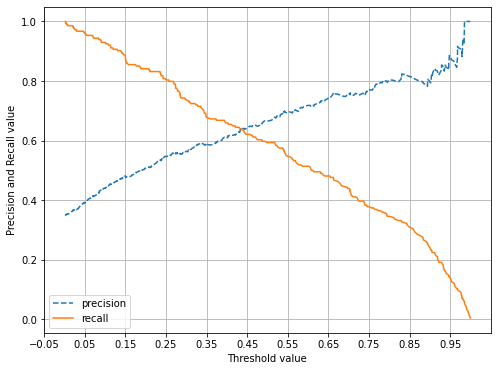

In [15]:
precision_recall_curve_plot(y_test,pred_proba)

In [16]:
indian.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
have_zero=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [18]:
indian[have_zero]=indian[have_zero].replace(0,indian[have_zero].mean())

In [19]:
indian.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
feature=df.iloc[:,:-1]
target=df.iloc[:,-1]

scaler=StandardScaler()
scale_feature=scaler.fit_transform(feature)
clf=LogisticRegression()

X_test,X_train,y_test,y_train=train_test_split(scale_feature,target,test_size=0.2,random_state=156)

clf.fit(X_train,y_train)
pred=clf.predict(X_test)

In [28]:
pred_proba=clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[346  57]
 [ 79 132]]
정확도: 0.7785, 정밀도: 0.6984, 재현율: 0.6256,    F1: 0.6600, AUC:0.8307


In [32]:
#다음으로 Binerary의 threshold값을 변화시켜주면서 정확도 상승 !!

from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        # roc_auc_score 관련 수정
        get_clf_eval(y_test , custom_predict, pred_proba_c1)
        print()

In [33]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[267 136]
 [ 37 174]]
정확도: 0.7182, 정밀도: 0.5613, 재현율: 0.8246,    F1: 0.6679, AUC:0.8307

임곗값: 0.33
오차 행렬
[[279 124]
 [ 43 168]]
정확도: 0.7280, 정밀도: 0.5753, 재현율: 0.7962,    F1: 0.6680, AUC:0.8307

임곗값: 0.36
오차 행렬
[[292 111]
 [ 51 160]]
정확도: 0.7362, 정밀도: 0.5904, 재현율: 0.7583,    F1: 0.6639, AUC:0.8307

임곗값: 0.39
오차 행렬
[[307  96]
 [ 58 153]]
정확도: 0.7492, 정밀도: 0.6145, 재현율: 0.7251,    F1: 0.6652, AUC:0.8307

임곗값: 0.42
오차 행렬
[[318  85]
 [ 65 146]]
정확도: 0.7557, 정밀도: 0.6320, 재현율: 0.6919,    F1: 0.6606, AUC:0.8307

임곗값: 0.45
오차 행렬
[[325  78]
 [ 73 138]]
정확도: 0.7541, 정밀도: 0.6389, 재현율: 0.6540,    F1: 0.6464, AUC:0.8307

임곗값: 0.48
오차 행렬
[[338  65]
 [ 76 135]]
정확도: 0.7704, 정밀도: 0.6750, 재현율: 0.6398,    F1: 0.6569, AUC:0.8307

임곗값: 0.5
오차 행렬
[[346  57]
 [ 79 132]]
정확도: 0.7785, 정밀도: 0.6984, 재현율: 0.6256,    F1: 0.6600, AUC:0.8307



In [34]:
binar=Binarizer(threshold=0.45)

new_pred=binar.fit_transform(pred_proba[:,1].reshape(-1,1))


get_clf_eval(y_test,pred,new_pred)

오차 행렬
[[346  57]
 [ 79 132]]
정확도: 0.7785, 정밀도: 0.6984, 재현율: 0.6256,    F1: 0.6600, AUC:0.7302
